In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import random #to generate random numbers 

In [2]:
from keras.datasets import mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data() 
print("x_train:" + str(x_train.shape))
print("y_train:" + str(y_train.shape))
print("x_test:" + str(x_test.shape))
print("y_test:" + str(y_test.shape))

Using TensorFlow backend.


x_train:(60000, 28, 28)
y_train:(60000,)
x_test:(10000, 28, 28)
y_test:(10000,)


index=54868


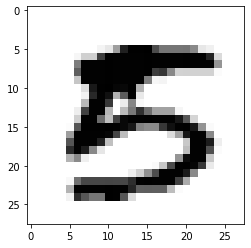

In [3]:
import matplotlib.pyplot as plt
index = random.randint(0,60000)
print("index=" +str(index))               #random index
plt.imshow(x_train[index], cmap = plt.cm.binary) #plot the random image at the index given using gray scale(the color map)
plt.show()

In [4]:
#reshape the matrices to (n, 28*28) and normalize
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)

x_train = keras.utils.normalize(x_train,axis=1) #only normalise the x
x_test = keras.utils.normalize(x_test,axis=1)

In [5]:
#creating a model with 2 hidden layers each with 128 nodes and a softmax output layer of 10 nodes

model = keras.models.Sequential()
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.compile(optimizer = "adam", loss = 'sparse_categorical_crossentropy', metrics =['accuracy'] ) 
#using sparse crossentroy as we have integer labels instead of one hot encoding  



In [6]:
model.fit(x_train,y_train, epochs = 5) #to fit the model 

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3340 - accuracy: 0.9043
Epoch 2/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.1359 - accuracy: 0.9592
Epoch 3/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0924 - accuracy: 0.9715
Epoch 4/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0683 - accuracy: 0.9789
Epoch 5/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0544 - accuracy: 0.9828


In [7]:
test_loss, test_acc = model.evaluate(x_test,y_test)  #evaluate model

10000/10000 [==============================] - 0s 40us/sample - loss: 0.0793 - accuracy: 0.9757


In [8]:
print(str(test_acc))

0.9757


In [9]:
model.save('mnist_number.model') #save the model

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mnist_number.model\assets
